# Data Importing

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os

In [ ]:
# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 734k/734k [00:00<00:00, 21.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1


In [ ]:
os.listdir('/root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1')

['diabetes_prediction_dataset.csv']

In [ ]:
df = pd.read_csv(path + '/diabetes_prediction_dataset.csv')

# Data Assessment

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


No missing values

In [ ]:
corr_m = df.select_dtypes(include=np.number).corr()
corr_m

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


**HbA1c_level	and blood_glucose_level** got highest correlation

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age'>

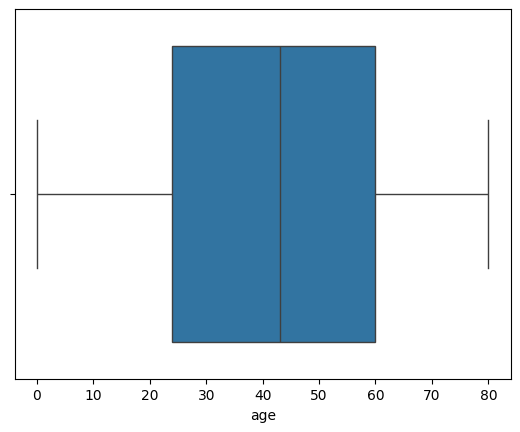

In [ ]:
sns.boxplot(x=df['age'])

<Axes: xlabel='bmi'>

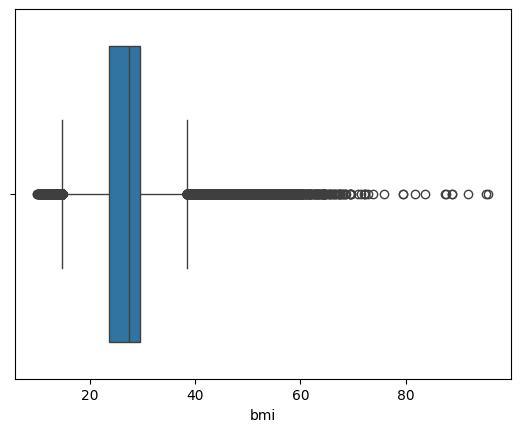

In [ ]:
sns.boxplot(x=df['bmi'])

### Anomaly is here BMI more than 60 is extremely rare, but posssible so i  leave it here.

<Axes: xlabel='bmi', ylabel='Count'>

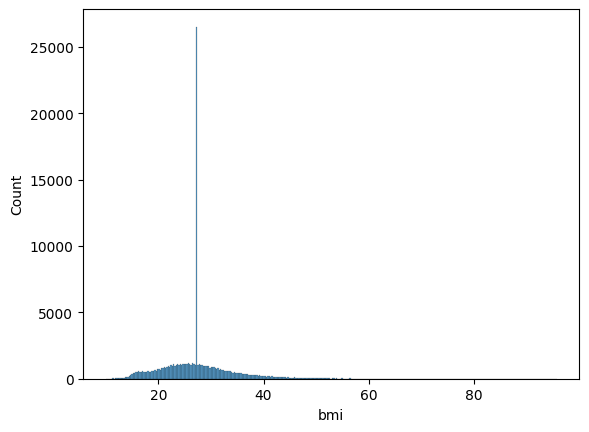

In [ ]:
sns.histplot(x=df['bmi'])

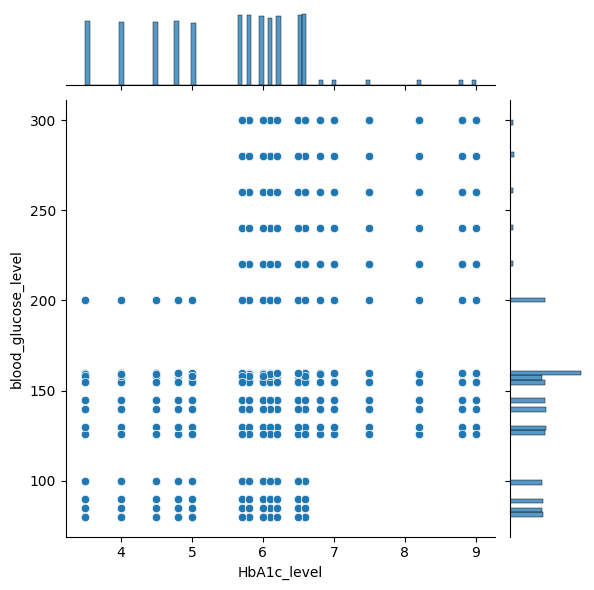

In [ ]:
sns.jointplot(x=df['HbA1c_level'], y=df['blood_glucose_level'])

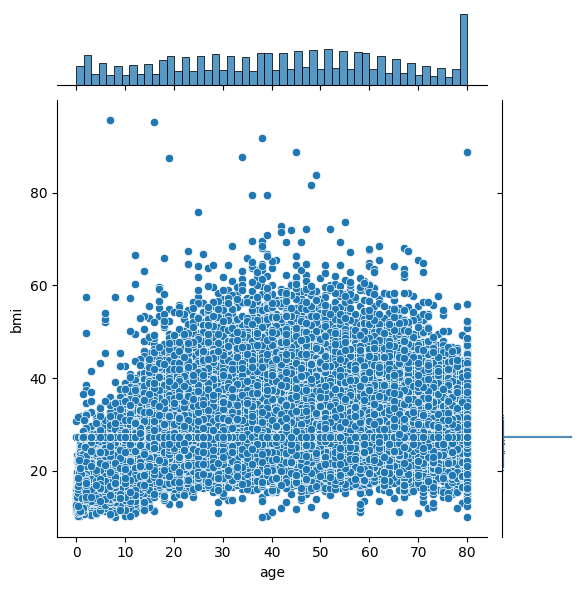

In [ ]:
sns.jointplot(x=df['age'], y=df['bmi'])

<Axes: xlabel='HbA1c_level'>

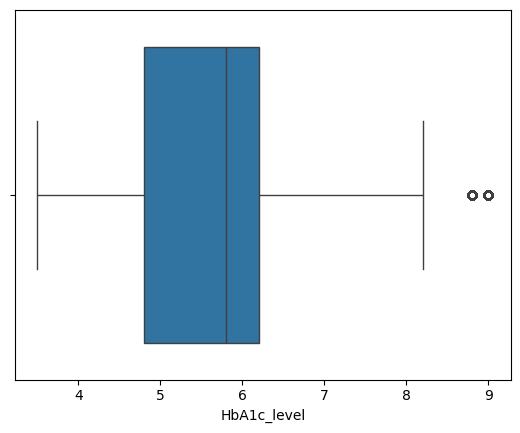

In [ ]:
sns.boxplot(x=df['HbA1c_level'])

<Axes: xlabel='blood_glucose_level'>

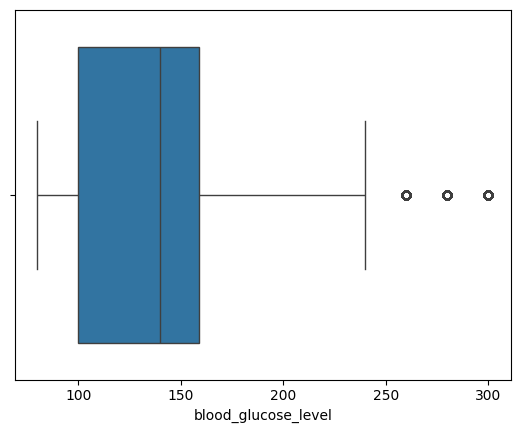

In [ ]:
sns.boxplot(x=df['blood_glucose_level'])

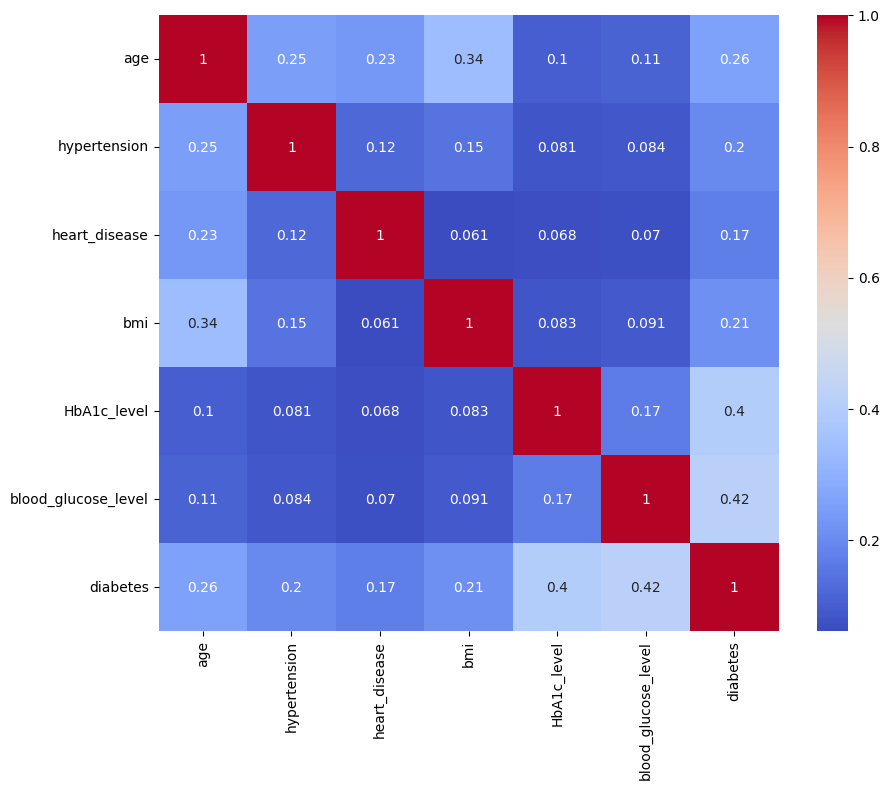

In [ ]:
corr_mm = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mm, annot=True, cmap='coolwarm')
plt.show()

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing

In [ ]:
num_values = X.select_dtypes(include=np.number)
cat_values = X.select_dtypes(exclude=np.number)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_values.columns),
    ('cat', OneHotEncoder(), cat_values.columns)
])

# Pipeline Creation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression Classifier

In [ ]:
pipeline_log = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(C=1.0, solver='liblinear', random_state=42))
])

In [ ]:
# Training
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['gender', 'smoking_history'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [ ]:
# Testing and Evaluating
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = pipeline_log.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95905

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



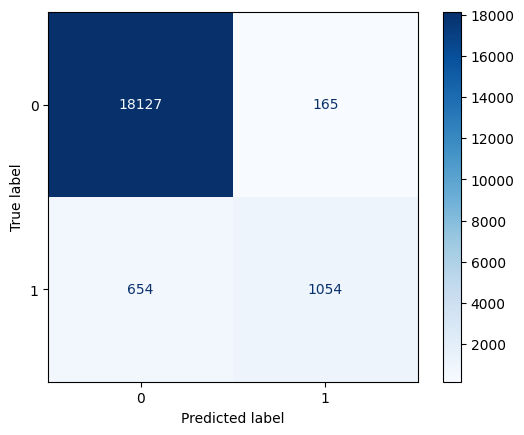

In [ ]:
conf_m = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=pipeline_log.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Random Forest

In [ ]:
pipeline_forest = Pipeline([
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42))
])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__n_estimators': [100, 200, 300]}
grid_search = GridSearchCV(pipeline_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'classifier__n_estimators': 100}


In [ ]:
pipeline_forest_best = Pipeline([
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42))
])

In [ ]:
#Training
pipeline_forest_best.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['gender', 'smoking_history'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        random_state=42))])

In [ ]:
#Testing And Evaluating
y_pred_forest = pipeline_forest_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))

Accuracy: 0.97215

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



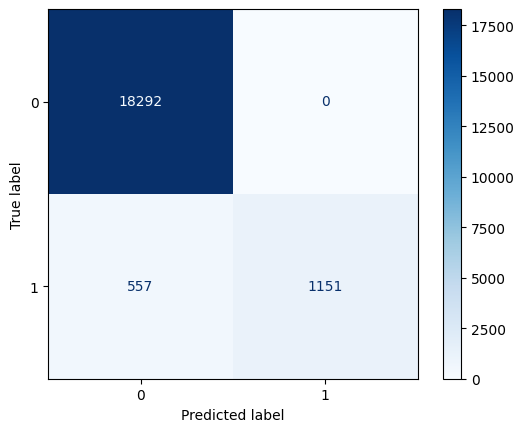

In [ ]:
conf_m_forest = confusion_matrix(y_test, y_pred_forest)
display_conf_m_forest = ConfusionMatrixDisplay(confusion_matrix=conf_m_forest, display_labels=pipeline_forest_best.classes_)
display_conf_m_forest.plot(cmap=plt.cm.Blues)
plt.show()

# Support Vector Machine

In [ ]:
pipeline_svm = Pipeline([
    ('preprocess', preprocess),
    ('classifier', SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42))
])

In [ ]:
# Training
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['gender', 'smoking_history'], dtype='object'))])),
                ('classifier', SVC(probability=True, random_state=42))])

In [ ]:
# Testing and Evaluating
y_pred_svm = pipeline_svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.96245

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.57      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000



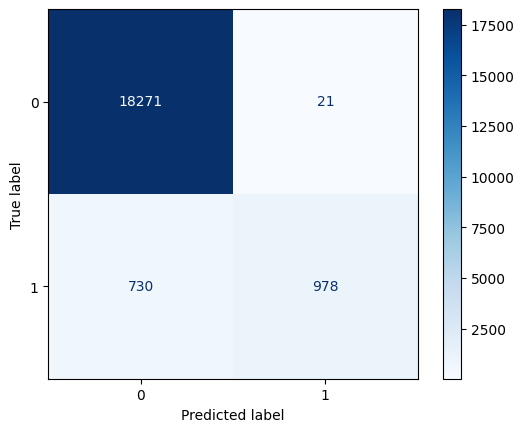

In [ ]:
conf_m_svm = confusion_matrix(y_test, y_pred_svm)
display_conf_m_svm = ConfusionMatrixDisplay(confusion_matrix=conf_m_svm, display_labels=pipeline_svm.classes_)
display_conf_m_svm.plot(cmap=plt.cm.Blues)
plt.show()

# Gradient Boosting (XGBoost)

In [ ]:
pipeline_xgb = Pipeline([
    ('preprocess', preprocess),
    ('classifier', XGBClassifier(learning_rate=0.02, n_estimators=100, max_depth=6, subsample=0.8, random_state=42))
])

In [ ]:
# Training
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['gender', 'smoking_history'], dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Testing and Evaluating

y_pred_xgb = pipeline_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.97215

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



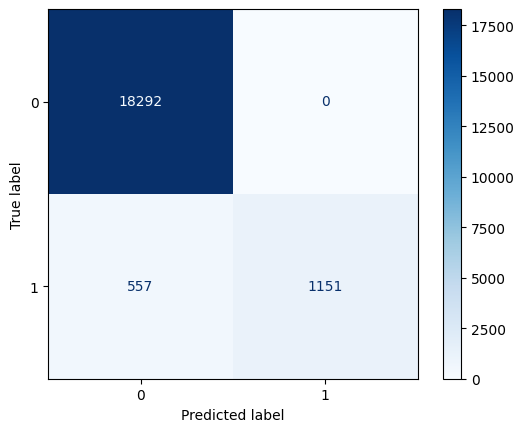

In [ ]:
conf_m_xgb = confusion_matrix(y_test, y_pred_xgb)
display_conf_m_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_m_xgb, display_labels=pipeline_xgb.classes_)
display_conf_m_xgb.plot(cmap=plt.cm.Blues)
plt.show()

#  K-Nearest Neighbors (KNN)

In [ ]:
pipeline_knn = Pipeline([
    ('preprocess', preprocess),
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski'))
])

In [ ]:
# Training
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['gender', 'smoking_history'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
#Testing and Evaluating
y_pred_knn = pipeline_knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.9604

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.89      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



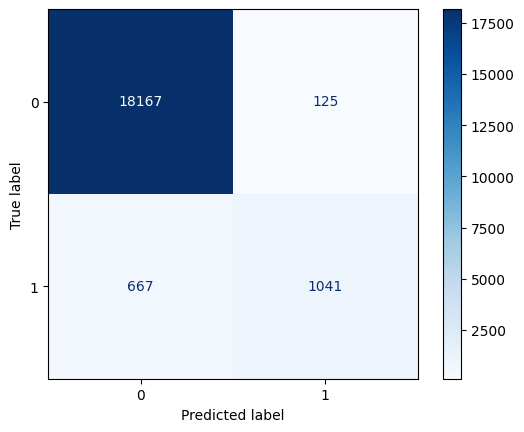

In [ ]:
conf_m_knn = confusion_matrix(y_test, y_pred_knn)
display_conf_m_knn = ConfusionMatrixDisplay(confusion_matrix=conf_m_knn, display_labels=pipeline_knn.classes_)
display_conf_m_knn.plot(cmap=plt.cm.Blues)
plt.show()

# Conclusion

 XGBoost (XGBC) and Random Forest are the top-performing models with:

Highest Accuracy (97.21%)
Highest Precision for Class 1 (1.00) (very few false positives)
Higher F1-score (0.81) compared to other models